Horse-vs-human using Deeplearning


In [ ]:
pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 kaggle.json

!kaggle datasets download -d rishitdagli/horses-vs-humans

 89% 137M/154M [00:01<00:00, 143MB/s]
100% 154M/154M [00:01<00:00, 132MB/s]


In [6]:

import zipfile

zip_path = '/content/horses-vs-humans.zip'  # Replace with the actual path to your zip file
extract_path = '/content/horsevshumans'  # Replace with the desired path to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [7]:
import os
train_horse_dir = os.path.join('/content/horsevshumans/horse-or-human/horses')
train_human_dir = os.path.join('/content/horsevshumans/horse-or-human/humans')



In [8]:
train_human_dir

'/content/horsevshumans/horse-or-human/humans'

In [12]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
print('total horse:' ,len(os.listdir(train_horse_dir)))
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
print('total human:' ,len(os.listdir(train_human_dir)))


['horse25-6.png', 'horse06-3.png', 'horse30-1.png', 'horse41-7.png', 'horse48-0.png', 'horse40-0.png', 'horse50-1.png', 'horse44-7.png', 'horse05-9.png', 'horse18-6.png']
total horse: 500
['human10-03.png', 'human09-07.png', 'human12-17.png', 'human15-02.png', 'human01-24.png', 'human07-26.png', 'human05-24.png', 'human09-00.png', 'human17-21.png', 'human13-03.png']
total human: 527


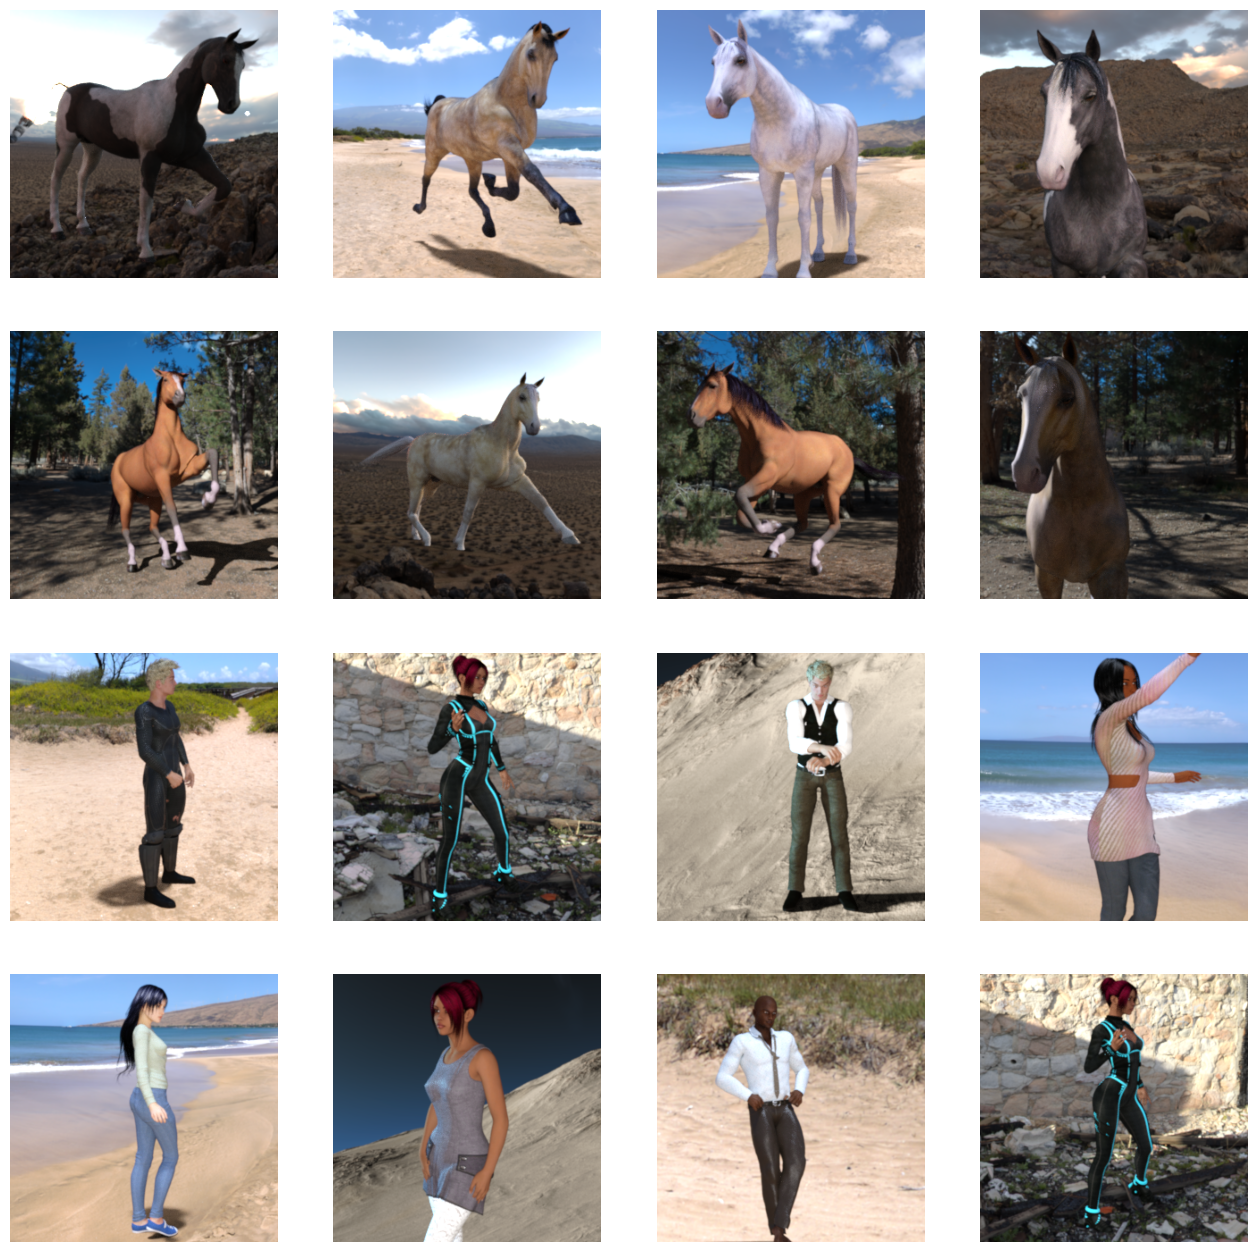

In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4 ,nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [20]:
import tensorflow as tf

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation ='sigmoid')

])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 16)       0

In [27]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss ='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1/255)

train_generator =train_datagen.flow_from_directory(
  '/content/horsevshumans/horse-or-human',
  target_size =(300,300),
  batch_size = 128,
  class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose =1)

Epoch 1/15
8/8 [==============================] - 21s 786ms/step - loss: 0.7280 - accuracy: 0.5889
Epoch 2/15
8/8 [==============================] - 7s 890ms/step - loss: 0.6299 - accuracy: 0.6263
Epoch 3/15
8/8 [==============================] - 7s 885ms/step - loss: 0.5170 - accuracy: 0.7529
Epoch 4/15
8/8 [==============================] - 6s 754ms/step - loss: 0.4775 - accuracy: 0.8265
Epoch 5/15
8/8 [==============================] - 7s 990ms/step - loss: 0.2447 - accuracy: 0.9244
Epoch 6/15
8/8 [==============================] - 7s 833ms/step - loss: 0.2612 - accuracy: 0.8921
Epoch 7/15
8/8 [==============================] - 7s 872ms/step - loss: 0.1772 - accuracy: 0.9355
Epoch 8/15
8/8 [==============================] - 6s 748ms/step - loss: 0.1099 - accuracy: 0.9655
Epoch 9/15
8/8 [==============================] - 6s 775ms/step - loss: 0.2594 - accuracy: 0.9021
Epoch 10/15
8/8 [==============================] - 7s 852ms/step - loss: 0.0850 - accuracy: 0.9733
Epoch 11/15
8/8 [=

1/1 [==============================] - 0s 19ms/step
The image is predicted as a human.


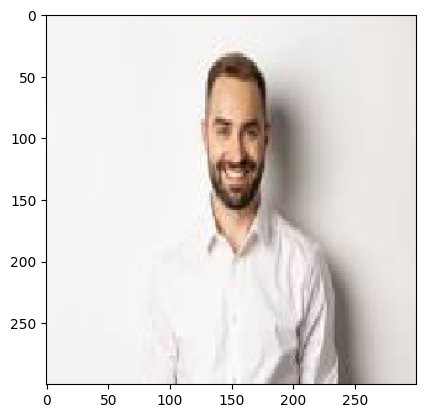

In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

path = '/content/images.jpeg'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
if prediction[0] > 0.5:
    print("The image is predicted as a human.")
else:
    print("The image is predicted as a horse.")

plt.imshow(img)
plt.show()
